1. Import required packages.
2. Load the data file
3. Select only the following columns from the dataset: 'PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'.

3 pts.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
listings = pd.read_csv(io.BytesIO(uploaded['newarkproperties.csv']))

Saving newarkproperties.csv to newarkproperties.csv


In [ ]:
listings = listings[['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']]

4. Check for missing values using a heatmap.
5. Check data distribution by property type using a histogram (bar graph).
6. Exclude records if appropriate.

3 pts.



In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PROPERTY TYPE  350 non-null    object 
 1   PRICE          350 non-null    int64  
 2   BEDS           334 non-null    float64
 3   BATHS          326 non-null    float64
 4   SQUARE FEET    78 non-null     float64
 5   LOT SIZE       297 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 16.5+ KB


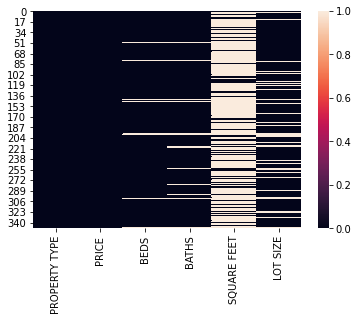

In [ ]:
sns.heatmap(listings.isnull(), cbar=True)

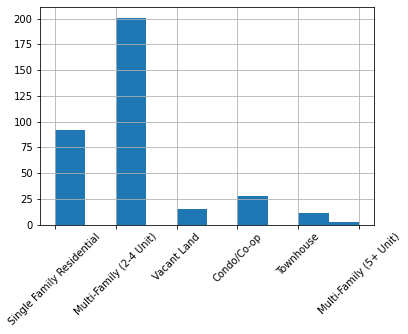

In [ ]:
listings['PROPERTY TYPE'].hist(xrot=45.0)

In [ ]:
listings['PROPERTY TYPE'].unique()

array(['Single Family Residential', 'Multi-Family (2-4 Unit)',
       'Vacant Land', 'Condo/Co-op', 'Townhouse',
       'Multi-Family (5+ Unit)'], dtype=object)

In [ ]:
property_types_to_remove = ['Vacant Land', 'Multi-Family (5+ Unit)']

listings.drop(listings[listings['PROPERTY TYPE'].isin(property_types_to_remove)].index, inplace=True)

7. Build a pairplot to evaluate data distributions and correlations.
8. Comment whether the predictors: 1) have a linear relationship with the target (Price), 2) display constant variance (homoscedasticity), 3) contain outliers that need to be excluded.

5 pts.

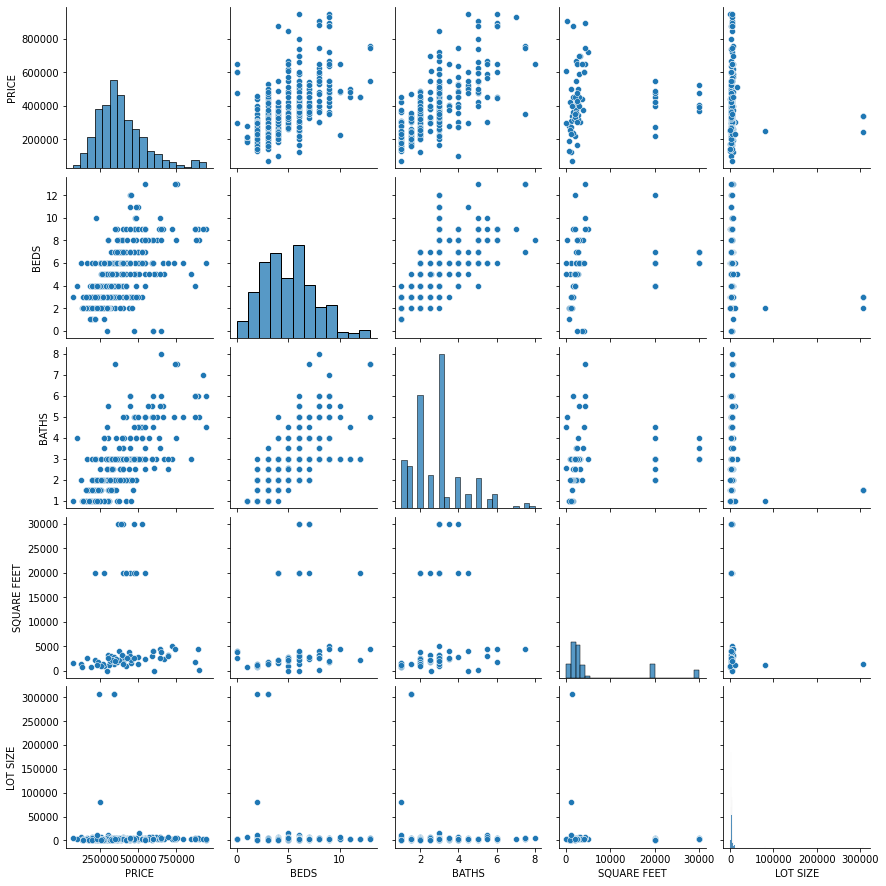

In [ ]:
sns.pairplot(listings)

9. Remove outliers if necessary.
10. Impute missing values as appropriate.

2 pts.


In [ ]:
listings.drop(listings[listings['SQUARE FEET'] > 7000].index, inplace=True)
listings.drop(listings[listings['SQUARE FEET'] < 200 ].index, inplace=True)
listings.drop(listings[listings['LOT SIZE'] > 50000 ].index, inplace=True)
listings.drop(listings[listings['LOT SIZE'] < 500 ].index, inplace=True)

In [ ]:
listings.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,309.000000,308.000000,303.000000,57.000000,267.000000
mean,387710.757282,5.142857,2.844884,2400.491228,3296.655431
std,158160.453130,2.431950,1.362591,1026.001482,1652.160402
min,70000.000000,0.000000,1.000000,780.000000,749.000000
25%,289000.000000,3.000000,2.000000,1665.000000,2496.000000
50%,359000.000000,5.000000,3.000000,2368.000000,2849.000000
75%,469000.000000,7.000000,3.000000,2997.000000,3920.000000
max,949000.000000,13.000000,8.000000,5044.000000,15647.000000


In [ ]:
imputed = listings.fillna(listings.mean())

In [ ]:
imputed.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,309.000000,309.000000,309.000000,309.000000,309.000000
mean,387710.757282,5.142857,2.844884,2400.491228,3296.655431
std,158160.453130,2.427998,1.349254,437.488502,1535.386328
min,70000.000000,0.000000,1.000000,780.000000,749.000000
25%,289000.000000,3.000000,2.000000,2400.491228,2500.000000
50%,359000.000000,5.000000,3.000000,2400.491228,3250.000000
75%,469000.000000,7.000000,3.000000,2400.491228,3798.000000
max,949000.000000,13.000000,8.000000,5044.000000,15647.000000


11. Split data 70/30 into training and test datasets.
12. Build a multiple linear regression model to predict Price.
13. Report R2, MAE, Max error, RMSE.
14. Comment on whether the model performance would be acceptable for practitioners.

7 pts.

In [ ]:
imputed.columns

Index(['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'], dtype='object')

In [ ]:
predictors = ['PROPERTY TYPE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']

In [ ]:
X = pd.get_dummies(imputed[predictors], drop_first=True)
y = imputed['PRICE']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
re_prices = LinearRegression()

re_prices.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X.columns

Index(['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'PROPERTY TYPE_Multi-Family (2-4 Unit)',
       'PROPERTY TYPE_Single Family Residential', 'PROPERTY TYPE_Townhouse'],
      dtype='object')

In [ ]:
re_prices.intercept_

6790.847525932884

In [ ]:
re_prices.coef_

array([-1.32079330e+03,  7.31157585e+04,  5.64363735e+01,  1.13468190e+01,
        2.85945151e+04, -2.52228607e+04, -1.20195861e+05])

In [ ]:
train_X.head()

,BEDS,BATHS,SQUARE FEET,LOT SIZE,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse
207,13.0,7.5,4308.000000,5662.0,1,0,0
224,2.0,3.0,2400.491228,3484.0,1,0,0
39,4.0,2.5,2000.000000,2613.0,0,1,0
213,5.0,3.0,2400.491228,2400.0,1,0,0
158,9.0,6.0,4400.000000,4356.0,1,0,0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score

In [ ]:
pred_y = re_prices.predict(valid_X)

In [ ]:
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

Regression model performance evaluation
R2:  0.48197144484525023
MAE:  78903.24812433904
RMSE:  107548.58805993827
Max error:  332743.18818950444


Comment whether the predictors: 1) have a linear relationship with the target (Price), 2) display constant variance (homoscedasticity), 3) contain outliers that need to be excluded.

- The predictors do have a linear relationship between the target variable. Predictors such as BEDS and BATHS generally influence the Price in a positive direction as an additional unit of these predictors is added. The randomness of Predictors such as SQUARE FEET and LOT SIZE seem to meet homoscedasticity criteria due to the fact that they have similar finite variances. This dataset does in fact contain outliers specifically in the SQUARE FEET and LOT SIZE Predictors. This dataset contains variables with very high values and impossibly low values. These outliers will not be included in the analysis to maintain a more homoscedastic dataset to yield more accurate results.

Comment on whether the model performance would be acceptable for practitioners.

- This model would not be acceptable for practitioners. Based on the results, this model produces error predictions at 52% of the value of the listing (R2 of about 0.48). The results yielded an average error of $78,903 below or above the actual price. This kind of average error reiterates the lack of usefulness of the model. Finally, the grand desparity between RMSE and MAE, further indicates this model is very much not good at predicting prices in listings in Newark, NJ from the given source.